# Natural Language Processing (NLP)
- Turing test를 위한 기본적인 기능
- **문서분류, 유사도 추정**
  - 스팸, 문서 주제, 성격 분류, 논문 표절 (유사도 검사)
  - 주로 count 측정
  - **N-Gram tokenize**
- **번역**
  - 문장 구조, context 분석
    - Part of Speech (POS) Tagging
- **문장 생성**
  - Chat-bot
  - Generative Adversarial Networks (GAN)


# N-Gram tokenize

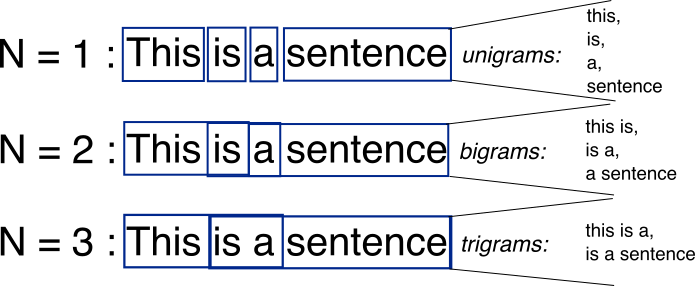

Reference: https://lamttic.github.io/2020/03/10/01.html

# 문서 특징 (features) 추출
- 문자 -> 숫자
- 복잡한 전처리 과정
- 추출된 features 이용, 분류모델 생성 (이전의 machine learning 적용)

# Feature Extraction (Sklearn)
- **DictVectorizer**
  - Dictionary Key
  - Value: One-hot-encoding
- **CountVectorizer**
  - Token
  - Value: Count
- **Tf-idfTransformer**
  - Term Frequency: 샘플에서의 Term(token) 빈도수
  - Document Frequency: 문서(전체)에서의 빈도수  
    idf: Inverse document frequency
  - $\text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)}$
  - $\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$

# NLP를 위한 toolkit
- Natural Language Toolkit (**NLTK**)
- Industrial-Strength Natural Language Processing (**spaCy**)
- Python package for Korean natural language processing (**KoNLPy**)
  - 한국어

# Terminology
- **Token**
  - 분석 단위
  - 일반적으로 단어 단위
  - 문장/알파벳 사용가능
- **Stem** - ex. Porter, lancaster
  - 어간, 활용어가 활용할 때 변하지 않는 부분  
  Ex. '보다, 보니, 보고' 에서 '보'
- **Lemma**
  - 표제어, 사전 검색에 활용되는 기본 표제어
  - 기본 단어 형태  
  Ex. '보다, 보니, 보고'에서 '보다' / '본다'

In [ ]:
import nltk
nltk.download('names')          # Colaboratory에서는 다운로드 필요
from nltk.corpus import names   # corpus: Examples collection

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [ ]:
type(names)
names_all = names.words()
# names.fileids()
names_male = names.words('male.txt')
names_female = names.words('female.txt')
print(len(names_all))
print(len(names_male))
print(len(names_female))

7944
2943
5001


- train(): Sklearn의 fit()과 같음
- (featureset, label): X, y의 형태가 아닌 featureset, label의 형태로 넣어주어야 함
  - featureset: X (dictionary 형식)
  - label: y

In [ ]:
import random

"""
Feture Extraction
Ex. first 문자, last 문자, 길이, etc.
"""
# Features를 설정해서 dict를 만들 수 있다
def mk_fset(d): # labeled set을 만드는 function 
  return {'last_char': d[-1], 'first_char':d[0], 'length': len(d)}

names_labeled = [(mk_fset(n), 'male') for n in names_male] + [(mk_fset(n), 'female') for n in names_female]
random.shuffle(names_labeled)
print(names_labeled)

nb = nltk.NaiveBayesClassifier.train(names_labeled[4000:])   # scikit-learn, fit
#nb.classify({'last_char':'x', 'first_char':'B'})      # scikit-learn, predict
print(names_labeled[5001][1])
nb.classify(names_labeled[5001][0])

nltk.classify.accuracy(nb, names_labeled[4000:])

[({'last_char': 'y', 'first_char': 'P', 'length': 5}, 'female'), ({'last_char': 'e', 'first_char': 'I', 'length': 4}, 'female'), ({'last_char': 'e', 'first_char': 'Y', 'length': 6}, 'female'), ({'last_char': 'a', 'first_char': 'S', 'length': 6}, 'female'), ({'last_char': 'n', 'first_char': 'H', 'length': 6}, 'male'), ({'last_char': 's', 'first_char': 'S', 'length': 6}, 'male'), ({'last_char': 'e', 'first_char': 'V', 'length': 6}, 'female'), ({'last_char': 'e', 'first_char': 'K', 'length': 6}, 'female'), ({'last_char': 'e', 'first_char': 'T', 'length': 8}, 'female'), ({'last_char': 'u', 'first_char': 'M', 'length': 8}, 'male'), ({'last_char': 'a', 'first_char': 'S', 'length': 8}, 'female'), ({'last_char': 'a', 'first_char': 'J', 'length': 7}, 'female'), ({'last_char': 'n', 'first_char': 'T', 'length': 5}, 'male'), ({'last_char': 'a', 'first_char': 'R', 'length': 5}, 'female'), ({'last_char': 'w', 'first_char': 'W', 'length': 6}, 'female'), ({'last_char': 'a', 'first_char': 'M', 'length'

0.7885395537525355

# Sklearn Feature Extraction

# DictVectorizer
- Dictionary를 받아 one-hot encoding으로 사용

In [ ]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
print(vec.fit_transform(measurements).toarray())

vec.get_feature_names_out()

[[ 1.  0.  0. 33.]
 [ 0.  1.  0. 12.]
 [ 0.  0.  1. 18.]]


array(['city=Dubai', 'city=London', 'city=San Francisco', 'temperature'],
      dtype=object)

# CountVectorizer
- **fit**
  - 단어별로 tokenizing (중복 제거)
  - 각 단어를 features으로 변경
- **transform**
  - 새로운 문장을 단어 단위로 tokenizing한 뒤, count를 기록

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

txt = ['this is the first line.', 'this is the second line.']

cv = CountVectorizer()
cv.fit(txt)
print(cv.get_feature_names_out())
print(cv.transform(['this is line line.']).toarray())
print(cv.transform(['this is the second second.']).toarray())
print(cv.transform(['this is the third line.']).toarray())

['first' 'is' 'line' 'second' 'the' 'this']
[[0 1 2 0 0 1]]
[[0 1 0 2 1 1]]
[[0 1 1 0 1 1]]


In [ ]:
import numpy as np
import pandas as pd

# 예제 1
- 영화 평론글을 tokenizing 하기
- 크기가 너무 커서 5000개만 사용
- id: Unique ID of each review
- sentiment: Sentiment of the review; **1 for positive reviews** and **0 for negative reviews**
- review: Text of the review
- https://www.kaggle.com/datasets/ymanojkumar023/kumarmanoj-bag-of-words-meets-bags-of-popcorn

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/labeledTrainData-movie_sentiment.tsv', sep = '\t')
pd_data = pd_data.iloc[:5000, 1:3]

print(pd_data.head())
print(pd_data['review'][0])

   sentiment                                             review
0          1  With all this stuff going down at the moment w...
1          1  \The Classic War of the Worlds\" by Timothy Hi...
2          0  The film starts with a manager (Nicholas Bell)...
3          0  It must be assumed that those who praised this...
4          1  Superbly trashy and wondrously unpretentious 8...
With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually im

# HTML 특정 code or tag 제거

In [ ]:
from bs4 import BeautifulSoup

for i in range(len(pd_data.index)):
  pd_data.loc[i,'review'] = BeautifulSoup(pd_data.loc[i, 'review'], 'html.parser').get_text()
print(pd_data)
# with_tag = pd_data['review'][0]
# without_tag = BeautifulSoup(with_tag, 'html.parser').get_text()
# print(with_tag)
# print(without_tag)

      sentiment                                             review
0             1  With all this stuff going down at the moment w...
1             1  \The Classic War of the Worlds\" by Timothy Hi...
2             0  The film starts with a manager (Nicholas Bell)...
3             0  It must be assumed that those who praised this...
4             1  Superbly trashy and wondrously unpretentious 8...
...         ...                                                ...
4995          0  Is this film a joke? Is it a comedy? Surely it...
4996          1  Don't waste time reading my review. Go out and...
4997          0  The secret is...this movie blows. Sorry, but i...
4998          1  After reading the original play I thought it w...
4999          1  The story is extremely unique.It's about these...

[5000 rows x 2 columns]


# Tokenizing

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenizing(review):
  return nltk.word_tokenize(review)

# w_token = nltk.word_tokenize(without_tag)
# print(w_token)

# s_token = nltk.sent_tokenize(without_tag)
# print(s_token)

In [ ]:
pd_data['tokenized review'] = pd_data['review'].apply(tokenizing)
print(pd_data)

      sentiment                                             review  \
0             1  With all this stuff going down at the moment w...   
1             1  \The Classic War of the Worlds\" by Timothy Hi...   
2             0  The film starts with a manager (Nicholas Bell)...   
3             0  It must be assumed that those who praised this...   
4             1  Superbly trashy and wondrously unpretentious 8...   
...         ...                                                ...   
4995          0  Is this film a joke? Is it a comedy? Surely it...   
4996          1  Don't waste time reading my review. Go out and...   
4997          0  The secret is...this movie blows. Sorry, but i...   
4998          1  After reading the original play I thought it w...   
4999          1  The story is extremely unique.It's about these...   

                                       tokenized review  
0     [With, all, this, stuff, going, down, at, the,...  
1     [\The, Classic, War, of, the, Worlds\

# Stopwords (불용어)
- 언어적으로 필요하지 않은 단어들 
- 제외해야 할 tokens

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.fileids()
stopwords.words('english')

In [ ]:
def rem_stop(word_tokenize):
  result = []
  for w in word_tokenize:
    if w not in stopwords.words('english') and w .isalpha():
      result.append(w)
  return result
#print(stopwords_filtered_out)
# print(non_alpha_filtered_out)

In [ ]:
pd_data['filtered review'] = pd_data['tokenized review'].apply(lambda x: rem_stop(x, ))
print(pd_data)

      sentiment                                             review  \
0             1  With all this stuff going down at the moment w...   
1             1  \The Classic War of the Worlds\" by Timothy Hi...   
2             0  The film starts with a manager (Nicholas Bell)...   
3             0  It must be assumed that those who praised this...   
4             1  Superbly trashy and wondrously unpretentious 8...   
...         ...                                                ...   
4995          0  Is this film a joke? Is it a comedy? Surely it...   
4996          1  Don't waste time reading my review. Go out and...   
4997          0  The secret is...this movie blows. Sorry, but i...   
4998          1  After reading the original play I thought it w...   
4999          1  The story is extremely unique.It's about these...   

                                       tokenized review  \
0     [With, all, this, stuff, going, down, at, the,...   
1     [\The, Classic, War, of, the, World

In [ ]:
# Filter 함수 전체
def filter(review):
  result = []
  fil0 = BeautifulSoup(review, 'html.parser').get_text()
  fil1 = nltk.word_tokenize(fil0)
  for w in fil1:
    if w not in stopwords.words('english') and w .isalpha():
      result.append(w)
  return result

# Feature Extraction
- 전체 review에서 가장 빈도수 높은 단어 10개 선택
- 각각 리뷰마다, CountVectorize 실행 (Vector값 추출)
- 추출된 vector 값(X), sentiment(y) 값을 이용, 분류모델 디자인
- https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- tokenizing, stop_words 제거
- 가장 많이 등장하는 top 20개의 단어
- 그중 's', 't'와 같이 의미를 알 수 없는 단어를 제외한 top 10에 해당하는 단어들을 features으로 설정

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


          Word  Count
0           br  20824
1        movie   8593
2         film   8231
3         like   4141
4         just   3602
5         good   3143
6         time   2576
7       really   2368
8        story   2366
9       people   1940
10         bad   1805
11       great   1787
12         don   1711
13        make   1634
14         way   1622
15      movies   1537
16       think   1513
17   character   1464
18  characters   1444
19       films   1442
20       watch   1358
21        life   1340
22        seen   1331
23        plot   1302
24        love   1293
25         did   1288
26        best   1284
27      acting   1274
28      little   1252
29         man   1202
30        know   1186
31        does   1166
32      better   1118
33         end   1115
34         say   1080
35       scene   1079
36          ve   1032
37        real   1007
38         old    988
39      scenes    960
40       doesn    942
41    watching    928
42       years    914
43      actors    900
44       g

[Text(0, 0, '')]

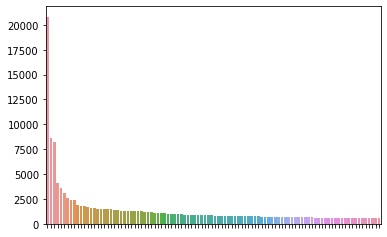

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(analyzer = 'word', token_pattern = r"(?u)\b\w+\w\b", stop_words = 'english').fit(pd_data['review'])
count = vect.transform(pd_data['review']).toarray().sum(axis = 0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
top_words = pd.DataFrame(list(zip(feature_name, count))[:50], columns = ['Word', 'Count'])
print(top_words)

bar = sns.barplot(x = np.arange(100), y = count[:100])
bar.set_xticklabels([''])

In [ ]:
feature_words = top_words['Word']

In [ ]:
counter = CountVectorizer().fit(feature_words)
print(counter.get_feature_names_out())
print(counter.transform(pd_data['review']).toarray())

['acting' 'actors' 'actually' 'bad' 'best' 'better' 'br' 'character'
 'characters' 'did' 'didn' 'director' 'does' 'doesn' 'don' 'end' 'film'
 'films' 'going' 'good' 'great' 'just' 'know' 'life' 'like' 'little'
 'love' 'make' 'man' 'movie' 'movies' 'old' 'people' 'plot' 'real'
 'really' 'say' 'scene' 'scenes' 'seen' 'story' 'thing' 'think' 'time'
 've' 'watch' 'watching' 'way' 'work' 'years']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


# X, y 설정 및 training, testing dataset 분리, standardization 적용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(counter.transform(pd_data['review']).toarray(), columns = counter.get_feature_names_out())
y = pd_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 상관관계 확인

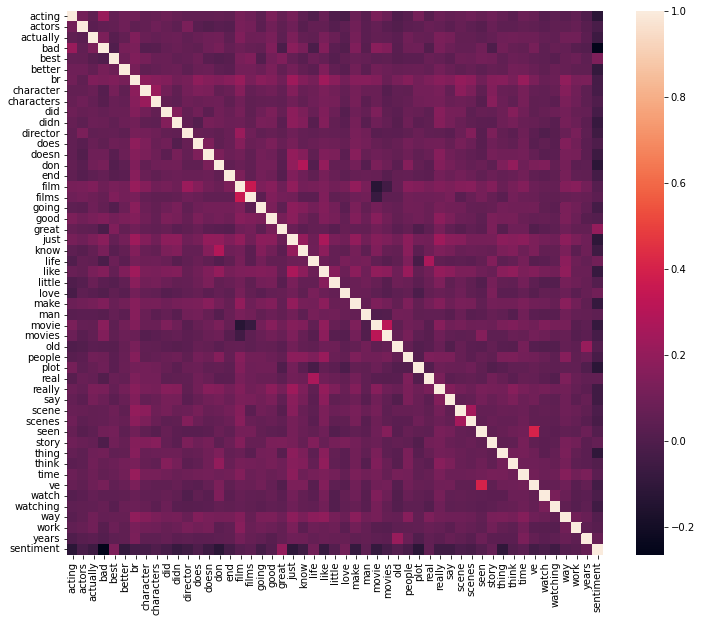

In [ ]:
data = X.copy(deep = False)
data['sentiment'] = y

fig, axe = plt.subplots(figsize = (12, 10))
sns.heatmap(data.corr(), ax = axe)

In [ ]:
print(data.corr()['sentiment'].describe())
correlation = data.corr()['sentiment']
#print(correlation)
filter1 = correlation[correlation < -0.1]
filter2 = correlation[correlation > 0.1]
print(filter1.index)
print(filter2.index)
filter = list(filter1.index) + list(filter2.index)
filter.remove('sentiment')
print(filter)
print(len(filter))

count    51.000000
mean      0.000414
std       0.161291
min      -0.264747
25%      -0.057099
50%      -0.025297
75%       0.017446
max       1.000000
Name: sentiment, dtype: float64
Index(['acting', 'bad', 'don', 'just', 'plot', 'thing'], dtype='object')
Index(['best', 'great', 'life', 'love', 'sentiment'], dtype='object')
['acting', 'bad', 'don', 'just', 'plot', 'thing', 'best', 'great', 'life', 'love']
10


In [ ]:
X = X[filter]
y = pd_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# 예측 모델 만들기
- Random Forest, Logistic Regression 사용

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier(max_depth = 6, n_estimators = 200, n_jobs = 6)
clf3 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 6)

models = [('Logistic Regression', clf1), ('Random Forest', clf2), ('Gradient Boosting', clf3)]
for label, model in models:
  model.fit(X_train, y_train)
  print(label, 'accuracy: ', model.score(X_test, y_test))

Logistic Regression accuracy:  0.6792
Random Forest accuracy:  0.6584
Gradient Boosting accuracy:  0.6536


# 예제 2
- Spambase data의 단어를 분석해 spam인지 아닌지 판단하는 모델 디자인
- https://archive.ics.uci.edu/ml/datasets/spambase
- 48개의 columns은 단어에 대한 빈도
- 6개의 columns은 특정 기호에 대한 빈도
- 그외
- average length of uninterrupted sequences of capital letters
- length of longest uninterrupted sequence of capital letters
- total number of capital letters in the e-mail
- Target:
  - class attribute of type spam (spam (1) or not (0))

# Feature Extraction이 끝난 상태

In [ ]:
spam_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/spambase_data.csv', header = None)
print(spam_data)

        0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55  

In [ ]:
X = spam_data.iloc[:,:57]
y = spam_data[57]

X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(max_depth = 6, n_estimators = 100, n_jobs = 6)
clf3 = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 100, max_depth = 6)

models = [('Logistic Regression', clf1), ('Random Forest', clf2), ('Gradient Boosting', clf3)]
for label, model in models:
  model.fit(scaled_X_train, y_train)
  print(label, ' accuracy: ', model.score(scaled_X_test, y_test))

Logistic Regression  accuracy:  0.9244135534317984
Random Forest  accuracy:  0.947871416159861
Gradient Boosting  accuracy:  0.9669852302345786
